In [157]:
import requests
import numpy as np
import urllib.request
import pandas as pd
import csv
from bs4 import BeautifulSoup
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')  
import warnings
warnings.filterwarnings('ignore')

In [160]:
# Save the data to a DataFrame object.
df_tracking=pd.read_csv(r'C:\Users\ACER\Downloads\Nigeria-COVID-19-Data-Analysis-Using-Python-main\NCDC Website scrap\COVID-19 Cases Tracking Dashboard_Page 1_Table.csv')

In [161]:
# save the data to a DataFrame object.
df_confirmed=pd.read_csv(r'C:\Users\ACER\Downloads\Nigeria-COVID-19-Data-Analysis-Using-Python-main\John Hopkins Data Repository\time_series_covid19_confirmed_global.csv')
df_recovered=pd.read_csv(r'C:\Users\ACER\Downloads\Nigeria-COVID-19-Data-Analysis-Using-Python-main\John Hopkins Data Repository\time_series_covid19_recovered_global.csv')
df_deaths=pd.read_csv(r'C:\Users\ACER\Downloads\Nigeria-COVID-19-Data-Analysis-Using-Python-main\John Hopkins Data Repository\time_series_covid19_deaths_global.csv')

In [162]:
df_covid_external=pd.read_csv(r'C:\Users\ACER\Downloads\Nigeria-COVID-19-Data-Analysis-Using-Python-main\Nigeria-COVID-19-Data-Analysis-Using-Python-main\covid_external.csv')
df_RealGDP=pd.read_csv(r'C:\Users\ACER\Downloads\Nigeria-COVID-19-Data-Analysis-Using-Python-main\Nigeria-COVID-19-Data-Analysis-Using-Python-main\RealGDP.csv')
df_covidnig=pd.read_csv(r'C:\Users\ACER\Downloads\Nigeria-COVID-19-Data-Analysis-Using-Python-main\Nigeria-COVID-19-Data-Analysis-Using-Python-main\covidnig.csv')

In [ ]:
#External Data
#Save the external data to a DataFrame

In [244]:
df_Budget_data=pd.read_csv(r'C:\Users\ACER\Downloads\Nigeria-COVID-19-Data-Analysis-Using-Python-main\Nigeria-COVID-19-Data-Analysis-Using-Python-main\Budget data.csv')

In [ ]:
#Other External data

In [164]:
df_vaccination=pd.read_csv(r'C:\Users\ACER\Downloads\Nigeria-COVID-19-Data-Analysis-Using-Python-main\NCDC Website scrap\vaccination-data.csv')
df_vaccinationmet=pd.read_csv(r'C:\Users\ACER\Downloads\Nigeria-COVID-19-Data-Analysis-Using-Python-main\NCDC Website scrap\vaccination-metadata.csv')
df_whodata=pd.read_csv(r'C:\Users\ACER\Downloads\Nigeria-COVID-19-Data-Analysis-Using-Python-main\NCDC Website scrap\WHO-COVID-19-global-data.csv')
df_whotdata=pd.read_csv(r'C:\Users\ACER\Downloads\Nigeria-COVID-19-Data-Analysis-Using-Python-main\NCDC Website scrap\WHO-COVID-19-global-table-data.csv')

In [ ]:
#Task 2 - View the data
#Obtain basic information about the data using the head() and info() method.

In [165]:
df_tracking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         37 non-null     object
 1   Total cases  37 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 720.0+ bytes


In [166]:
df_tracking.head()

,Name,Total cases
0,Lagos,99131
1,Federal Capital Territory,28597
2,"Portharcourt, Rivers State",16632
3,"Kaduna, Kaduna State",11236
4,"Bokkos, Plateau State",10250


In [167]:
df_tracking.isnull().sum()

Name           0
Total cases    0
dtype: int64

In [168]:
df_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/18/22,3/19/22,3/20/22,3/21/22,3/22/22,3/23/22,3/24/22,3/25/22,3/26/22,3/27/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,176983,177039,177093,177191,177255,177321,177321,177321,177321,177520
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,272961,273040,273088,273088,273146,273164,273257,273318,273387,273432
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,265524,265539,265550,265562,265573,265585,265599,265612,265621,265629
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,39234,39234,39234,39234,39234,39713,39713,39713,39713,39713
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,99003,99003,99003,99010,99058,99058,99081,99102,99106,99115


In [169]:
df_confirmed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Columns: 800 entries, Province/State to 3/27/22
dtypes: float64(2), int64(796), object(2)
memory usage: 1.7+ MB


In [170]:
df_confirmed.isnull().sum()

Province/State    195
Country/Region      0
Lat                 2
Long                2
1/22/20             0
                 ... 
3/23/22             0
3/24/22             0
3/25/22             0
3/26/22             0
3/27/22             0
Length: 800, dtype: int64

In [171]:
df_recovered.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/18/22,3/19/22,3/20/22,3/21/22,3/22/22,3/23/22,3/24/22,3/25/22,3/26/22,3/27/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [172]:
df_recovered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Columns: 800 entries, Province/State to 3/27/22
dtypes: float64(2), int64(796), object(2)
memory usage: 1.6+ MB


In [173]:
df_recovered.isnull().sum()

Province/State    196
Country/Region      0
Lat                 1
Long                1
1/22/20             0
                 ... 
3/23/22             0
3/24/22             0
3/25/22             0
3/26/22             0
3/27/22             0
Length: 800, dtype: int64

In [174]:
df_deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/18/22,3/19/22,3/20/22,3/21/22,3/22/22,3/23/22,3/24/22,3/25/22,3/26/22,3/27/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7651,7652,7654,7654,7656,7657,7657,7657,7657,7662
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3487,3487,3487,3487,3489,3489,3489,3490,3491,3491
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6871,6871,6871,6872,6873,6873,6873,6873,6873,6873
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,153,153,153,153,153,153,155,153,153,153
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1900,1900,1900,1900,1900,1900,1900,1900,1900,1900


In [175]:
df_deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Columns: 800 entries, Province/State to 3/27/22
dtypes: float64(2), int64(796), object(2)
memory usage: 1.7+ MB


In [176]:
df_deaths.isnull().sum()

Province/State    195
Country/Region      0
Lat                 2
Long                2
1/22/20             0
                 ... 
3/23/22             0
3/24/22             0
3/25/22             0
3/26/22             0
3/27/22             0
Length: 800, dtype: int64

In [177]:
df_covid_external.head()

,states,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,FCT,North Central,4865000,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79
1,Plateau,North Central,4766000,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93
2,Kwara,North Central,3524000,0.3,0.4,0.3,0.2,0.4,0.2,0.6,0.7,0.93
3,Nassarawa,North Central,2783000,0.1,0.3,0.5,0.9,0.0,0.1,0.6,0.5,0.85
4,Niger,North Central,6260000,0.6,0.0,0.6,0.3,0.7,0.1,0.8,0.8,0.84


In [178]:
df_covid_external.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   states                   37 non-null     object 
 1   region                   37 non-null     object 
 2   Population               37 non-null     int64  
 3   Overall CCVI Index       37 non-null     float64
 4   Age                      37 non-null     float64
 5   Epidemiological          37 non-null     float64
 6   Fragility                37 non-null     float64
 7   Health System            37 non-null     float64
 8   Population Density       37 non-null     float64
 9   Socio-Economic           37 non-null     float64
 10   Transport Availability  37 non-null     float64
 11  Acute IHR                37 non-null     float64
dtypes: float64(9), int64(1), object(2)
memory usage: 3.6+ KB


In [179]:
df_RealGDP.head()

,Year,Q1,Q2,Q3,Q4
0,2014,15438679.50,16084622.31,17479127.58,18150356.45
1,2015,16050601.38,16463341.91,17976234.59,18533752.07
2,2016,15943714.54,16218542.41,17555441.69,18213537.29
3,2017,15797965.83,16334719.27,17760228.17,18598067.07
4,2018,16096654.19,16580508.07,18081342.10,19041437.59


In [180]:
df_RealGDP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    7 non-null      int64  
 1   Q1      7 non-null      float64
 2   Q2      7 non-null      float64
 3   Q3      7 non-null      float64
 4   Q4      7 non-null      float64
dtypes: float64(4), int64(1)
memory usage: 408.0 bytes


In [181]:
df_covidnig.head()

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,"26,708","2,435","24,037",236
1,FCT,"9,627","2,840","6,694",93
2,Kaduna,"4,504",579,"3,877",48
3,Plateau,"4,262",280,"3,948",34
4,Oyo,"3,788",368,"3,374",46


In [182]:
df_covidnig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   States Affected               37 non-null     object
 1   No. of Cases (Lab Confirmed)  37 non-null     object
 2   No. of Cases (on admission)   37 non-null     object
 3   No. Discharged                37 non-null     object
 4   No. of Deaths                 37 non-null     int64 
dtypes: int64(1), object(4)
memory usage: 1.6+ KB


In [245]:
df_Budget_data.head()

,states,Initial_budget (Bn),Revised_budget (Bn)
0,Abia,136.60,102.70
1,Adamawa,183.30,139.31
2,Akwa-Ibom,597.73,366.00
3,Anambra,137.10,112.80
4,Bauchi,167.20,128.00


In [246]:
df_Budget_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   states               37 non-null     object 
 1   Initial_budget (Bn)  37 non-null     float64
 2   Revised_budget (Bn)  37 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1016.0+ bytes


In [183]:
df_vaccination.head()

,COUNTRY,ISO3,WHO_REGION,DATA_SOURCE,DATE_UPDATED,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_FULLY_VACCINATED,PERSONS_FULLY_VACCINATED_PER100,VACCINES_USED,FIRST_VACCINE_DATE,NUMBER_VACCINES_TYPES_USED
0,Afghanistan,AFG,EMRO,REPORTING,2022-03-22,5751015.0,5082824.0,14.773,13.057,4420127.0,11.355,"Beijing CNBG - BBIBP-CorV,Janssen - Ad26.COV 2...",2021-02-22,4.0
1,Albania,ALB,EURO,REPORTING,2022-03-13,2764839.0,1296838.0,96.100,45.568,1215359.0,42.705,"AstraZeneca - Vaxzevria,Gamaleya - Gam-Covid-V...",2021-01-13,5.0
2,Algeria,DZA,AFRO,REPORTING,2022-03-09,13704895.0,7461932.0,31.253,17.017,6110712.0,13.935,"Beijing CNBG - BBIBP-CorV,Gamaleya - Gam-Covid...",2021-01-30,4.0
3,American Samoa,ASM,WPRO,REPORTING,2022-03-17,97346.0,43637.0,176.361,79.057,39137.0,70.904,"Janssen - Ad26.COV 2-S,Moderna - Spikevax,Pfiz...",2020-12-21,3.0
4,Andorra,AND,EURO,REPORTING,2022-03-13,151997.0,57817.0,196.700,75.898,53367.0,70.057,"AstraZeneca - Vaxzevria,Moderna - Spikevax,Pfi...",2021-01-20,3.0


In [184]:
df_vaccination.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   COUNTRY                               228 non-null    object 
 1   ISO3                                  228 non-null    object 
 2   WHO_REGION                            228 non-null    object 
 3   DATA_SOURCE                           228 non-null    object 
 4   DATE_UPDATED                          228 non-null    object 
 5   TOTAL_VACCINATIONS                    226 non-null    float64
 6   PERSONS_VACCINATED_1PLUS_DOSE         227 non-null    float64
 7   TOTAL_VACCINATIONS_PER100             226 non-null    float64
 8   PERSONS_VACCINATED_1PLUS_DOSE_PER100  227 non-null    float64
 9   PERSONS_FULLY_VACCINATED              226 non-null    float64
 10  PERSONS_FULLY_VACCINATED_PER100       226 non-null    float64
 11  VACCINES_USED      

In [185]:
df_vaccinationmet.head()

,ISO3,VACCINE_NAME,PRODUCT_NAME,COMPANY_NAME,AUTHORIZATION_DATE,START_DATE,END_DATE,COMMENT,DATA_SOURCE
0,JEY,Moderna - mRNA-1273,mRNA-1273,Moderna,NaN,NaN,NaN,NaN,OWID
1,JEY,AstraZeneca - AZD1222,AZD1222,AstraZeneca,NaN,NaN,NaN,NaN,OWID
2,JEY,Pfizer BioNTech - Comirnaty,Comirnaty,Pfizer BioNTech,NaN,NaN,NaN,NaN,OWID
3,GGY,Moderna - mRNA-1273,mRNA-1273,Moderna,NaN,NaN,NaN,NaN,OWID
4,GGY,AstraZeneca - AZD1222,AZD1222,AstraZeneca,NaN,NaN,NaN,NaN,OWID


In [186]:
df_vaccinationmet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881 entries, 0 to 880
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ISO3                881 non-null    object 
 1   VACCINE_NAME        881 non-null    object 
 2   PRODUCT_NAME        880 non-null    object 
 3   COMPANY_NAME        876 non-null    object 
 4   AUTHORIZATION_DATE  390 non-null    object 
 5   START_DATE          619 non-null    object 
 6   END_DATE            0 non-null      float64
 7   COMMENT             0 non-null      float64
 8   DATA_SOURCE         881 non-null    object 
dtypes: float64(2), object(7)
memory usage: 62.1+ KB


In [187]:
df_whodata.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0


In [188]:
df_whodata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192681 entries, 0 to 192680
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Date_reported      192681 non-null  object
 1   Country_code       191868 non-null  object
 2   Country            192681 non-null  object
 3   WHO_region         192681 non-null  object
 4   New_cases          192681 non-null  int64 
 5   Cumulative_cases   192681 non-null  int64 
 6   New_deaths         192681 non-null  int64 
 7   Cumulative_deaths  192681 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 11.8+ MB


In [189]:
df_whotdata.head()

,Name,WHO Region,Cases - cumulative total,Cases - cumulative total per 100000 population,Cases - newly reported in last 7 days,Cases - newly reported in last 7 days per 100000 population,Cases - newly reported in last 24 hours,Deaths - cumulative total,Deaths - cumulative total per 100000 population,Deaths - newly reported in last 7 days,Deaths - newly reported in last 7 days per 100000 population,Deaths - newly reported in last 24 hours
Global,NaN,476374234,6111.639841,11346063,145.564234,1608935,6108976,78.375064,42807,0.549192,5143,NaN
United States of America,Americas,79139385,23908.988000,207078,62.561000,47528,967905,292.416000,5552,1.677000,1335,NaN
India,South-East Asia,43016372,3117.119000,12367,0.896000,1685,516755,37.446000,474,0.034000,83,NaN
Brazil,Americas,29729991,13986.673000,251952,118.533000,47376,657998,309.560000,2058,0.968000,302,NaN
France,Europe,23903547,36752.433000,757551,1164.758000,148243,138273,212.599000,695,1.069000,124,NaN


In [190]:
df_whotdata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 238 entries, Global to Tuvalu
Data columns (total 12 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Name                                                          237 non-null    object 
 1   WHO Region                                                    238 non-null    int64  
 2   Cases - cumulative total                                      237 non-null    float64
 3   Cases - cumulative total per 100000 population                238 non-null    int64  
 4   Cases - newly reported in last 7 days                         237 non-null    float64
 5   Cases - newly reported in last 7 days per 100000 population   238 non-null    int64  
 6   Cases - newly reported in last 24 hours                       238 non-null    int64  
 7   Deaths - cumulative total                                     237 no

In [191]:
#Task 3 - Data Cleaning and Preparation

In [192]:
#Renaming Name column
df_tracking.rename(columns={"Name":"City/State"},inplace='True')
df_tracking.head()

,City/State,Total cases
0,Lagos,99131
1,Federal Capital Territory,28597
2,"Portharcourt, Rivers State",16632
3,"Kaduna, Kaduna State",11236
4,"Bokkos, Plateau State",10250


In [193]:
df_covidnig.rename(columns={"No. of Cases (Lab Confirmed)":"Confirmed Lab Cases"},inplace='True')

In [194]:
df_covidnig.rename(columns={"No. of Cases (on admission)":"Confirmed Admission Cases"},inplace='True')

In [195]:
df_covidnig.rename(columns={"No. Discharged":"Discharged cases"},inplace='True')

In [230]:
df_covidnig.head()

,States Affected,Confirmed Lab Cases,Confirmed Admission Cases,Discharged cases,No. of Deaths
0,Lagos,"26,708","2,435","24,037",236
1,FCT,"9,627","2,840","6,694",93
2,Kaduna,"4,504",579,"3,877",48
3,Plateau,"4,262",280,"3,948",34
4,Oyo,"3,788",368,"3,374",46


In [197]:
#Removing NaN value
df_confirmed['Province/State'] = df_confirmed['Province/State'].fillna('Nil')
df_confirmed[ ['Lat', 'Long']] = df_confirmed[ ['Lat', 'Long']].fillna(0)
df_recovered['Province/State'] = df_recovered['Province/State'].fillna('Nil')
df_recovered[ ['Lat', 'Long']] = df_recovered[ ['Lat', 'Long']].fillna(0)
df_deaths['Province/State'] = df_deaths['Province/State'].fillna('Nil')
df_deaths[ ['Lat', 'Long']] = df_deaths[ ['Lat', 'Long']].fillna(0)

In [198]:
df_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/18/22,3/19/22,3/20/22,3/21/22,3/22/22,3/23/22,3/24/22,3/25/22,3/26/22,3/27/22
0,Nil,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,176983,177039,177093,177191,177255,177321,177321,177321,177321,177520
1,Nil,Albania,41.15330,20.168300,0,0,0,0,0,0,...,272961,273040,273088,273088,273146,273164,273257,273318,273387,273432
2,Nil,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,265524,265539,265550,265562,265573,265585,265599,265612,265621,265629
3,Nil,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,39234,39234,39234,39234,39234,39713,39713,39713,39713,39713
4,Nil,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,99003,99003,99003,99010,99058,99058,99081,99102,99106,99115


In [199]:
#Convert to appropriate data type
df_covid_external.Age = df_covid_external.Age.astype(int)
df_covid_external['Age'].dtype

dtype('int32')

In [200]:
#Remove comma(,) in numerical data

In [234]:
df_covidnig["Confirmed Lab Cases"] = df_covidnig["Confirmed Lab Cases"].str.replace(',','')
df_covidnig["Confirmed Admission Cases"] = df_covidnig["Confirmed Admission Cases"].str.replace(',','')
df_covidnig["Discharged cases"] = df_covidnig["Discharged cases"].str.replace(',','')
df_covidnig.head()

,States Affected,Confirmed Lab Cases,Confirmed Admission Cases,Discharged cases,No. of Deaths
0,Lagos,26708,2435,24037,236
1,FCT,9627,2840,6694,93
2,Kaduna,4504,579,3877,48
3,Plateau,4262,280,3948,34
4,Oyo,3788,368,3374,46


In [202]:
#Extract daily data for Nigeria from the Global daily cases data
#Get a Pandas DataFrame for Daily Confirmed Cases in Nigeria.
df_confirmed[df_confirmed["Country/Region"] == "Nigeria"]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/18/22,3/19/22,3/20/22,3/21/22,3/22/22,3/23/22,3/24/22,3/25/22,3/26/22,3/27/22
203,Nil,Nigeria,9.082,8.6753,0,0,0,0,0,0,...,255103,255103,255103,255103,255190,255244,255244,255244,255296,255296


In [203]:
#Get a Pandas DataFrame for Daily Recovered Cases in Nigeria.
df_recovered[df_recovered["Country/Region"] == "Nigeria"]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/18/22,3/19/22,3/20/22,3/21/22,3/22/22,3/23/22,3/24/22,3/25/22,3/26/22,3/27/22
188,Nil,Nigeria,9.082,8.6753,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [204]:
#Get a Pandas DataFrame for Daily Death Cases in Nigeria.
df_deaths[df_deaths["Country/Region"] == "Nigeria"]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/18/22,3/19/22,3/20/22,3/21/22,3/22/22,3/23/22,3/24/22,3/25/22,3/26/22,3/27/22
203,Nil,Nigeria,9.082,8.6753,0,0,0,0,0,0,...,3142,3142,3142,3142,3142,3142,3142,3142,3142,3142


In [205]:
#Task 4 - Analysis

In [214]:
#TODO A - Generate a plot that shows the Top 10 states in terms of Confirmed Covid cases by Laboratory test
top_10_confirmed = df_covidnig.iloc[0:10, 0:2]
top_10_confirmed

,States Affected,Confirmed Lab Cases
0,Lagos,"26,708"
1,FCT,"9,627"
2,Kaduna,"4,504"
3,Plateau,"4,262"
4,Oyo,"3,788"
5,Rivers,"3,279"
6,Edo,"2,768"
7,Ogun,"2,382"
8,Kano,"2,032"
9,Delta,"1,843"


In [255]:
top_10_confirmed["Confirmed Lab Cases"] = top_10_confirmed["Confirmed Lab Cases"].str.replace(',','')
top_10_confirmed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   States Affected      10 non-null     object
 1   Confirmed Lab Cases  10 non-null     object
dtypes: object(2)
memory usage: 288.0+ bytes


In [261]:
top_10_confirmed["Confirmed Lab Cases"]= top_10_confirmed["Confirmed Lab Cases"].apply(pd.to_numeric)
top_10_confirmed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   States Affected      10 non-null     object
 1   Confirmed Lab Cases  10 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 288.0+ bytes


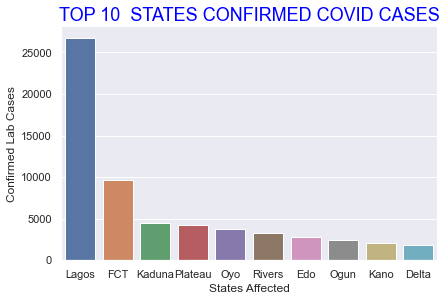

In [262]:
#confirmed lab cases was changed to numberic to enable the use of barplot
ax = sns.barplot(x="States Affected", y="Confirmed Lab Cases", data=top_10_confirmed)
plt.title(label= "TOP 10  STATES CONFIRMED COVID CASES", fontsize=18, color="blue")
sns.despine()

In [269]:
#TODO B - Generate a plot that shows the Top 10 states in terms of Discharged Covid cases. Hint - Sort the values
#we generate a dataframe for the top 10, then sort by discharged cases
top_10_discharged = df_covidnig.iloc[0:10, :4]
top_10_discharged.sort_values(by='Discharged cases',ascending=False)
top_10_discharged

,States Affected,Confirmed Lab Cases,Confirmed Admission Cases,Discharged cases
0,Lagos,26708,2435,24037
1,FCT,9627,2840,6694
2,Kaduna,4504,579,3877
3,Plateau,4262,280,3948
4,Oyo,3788,368,3374
5,Rivers,3279,232,2987
6,Edo,2768,52,2603
7,Ogun,2382,174,2175
8,Kano,2032,198,1778
9,Delta,1843,57,1737


In [271]:
#convert dtype of discharged cases to integer
top_10_discharged["Discharged cases"]= top_10_discharged["Discharged cases"].apply(pd.to_numeric)
top_10_discharged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   States Affected            10 non-null     object
 1   Confirmed Lab Cases        10 non-null     object
 2   Confirmed Admission Cases  10 non-null     object
 3   Discharged cases           10 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 448.0+ bytes


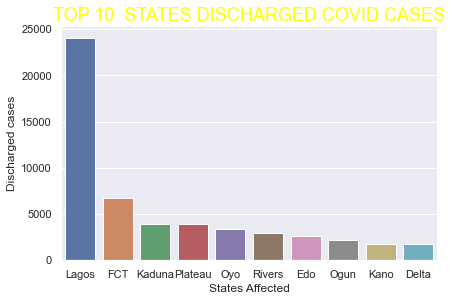

In [272]:
ax = sns.barplot(x="States Affected", y="Discharged cases", data=top_10_discharged)
plt.title(label= "TOP 10  STATES DISCHARGED COVID CASES", fontsize=18, color="yellow")
sns.despine()

In [273]:
#TODO D - Plot the top 10 Death cases
#sort values
df_deaths_sort=df_covidnig.sort_values(by='No. of Deaths',ascending=False)
df_deaths_sort.head()

,States Affected,Confirmed Lab Cases,Confirmed Admission Cases,Discharged cases,No. of Deaths
0,Lagos,26708,2435,24037,236
6,Edo,2768,52,2603,113
1,FCT,9627,2840,6694,93
5,Rivers,3279,232,2987,60
8,Kano,2032,198,1778,56


In [212]:
top_10_deaths = df_deaths_sort.iloc[0:10, 0:5]
top_10_deaths

,States Affected,Confirmed Lab Cases,Confirmed Admission Cases,Discharged cases,No. of Deaths
0,Lagos,"26,708","2,435","24,037",236
6,Edo,"2,768",52,"2,603",113
1,FCT,"9,627","2,840","6,694",93
5,Rivers,"3,279",232,"2,987",60
8,Kano,"2,032",198,"1,778",56
9,Delta,"1,843",57,"1,737",49
2,Kaduna,"4,504",579,"3,877",48
4,Oyo,"3,788",368,"3,374",46
10,Ondo,"1,793",62,"1,690",41
19,Borno,778,37,705,36


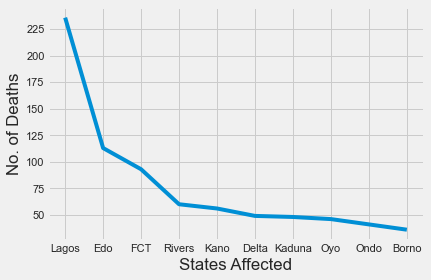

In [213]:
sns.lineplot(x="States Affected", y="No. of Deaths", data=top_10_deaths)
sns.set(style="darkgrid")

In [376]:
#TODO E - Generate a line plot for the total daily confirmed, recovered and death cases in Nigeria
#Extracting Nigeria data from the John Hopkins data sets and putting it into a dataframe
import glob
extension = 'csv'
path = (r"C:\Users\ACER\Downloads\Nigeria-COVID-19-Data-Analysis-Using-Python-main\John Hopkins Data Repository")
files = glob.glob(path + '/*.csv')
files

['C:\\Users\\ACER\\Downloads\\Nigeria-COVID-19-Data-Analysis-Using-Python-main\\John Hopkins Data Repository\\time_series_covid19_confirmed_global.csv',
 'C:\\Users\\ACER\\Downloads\\Nigeria-COVID-19-Data-Analysis-Using-Python-main\\John Hopkins Data Repository\\time_series_covid19_deaths_global.csv',
 'C:\\Users\\ACER\\Downloads\\Nigeria-COVID-19-Data-Analysis-Using-Python-main\\John Hopkins Data Repository\\time_series_covid19_recovered_global.csv']

In [377]:
All = []
for f in files:
    temp_df = pd.read_csv(f)
    All.append(temp_df)
    print(f'Successfully created dataframe for {f} with shape {temp_df.shape}')
df_global = pd.concat(All, axis=0)

Successfully created dataframe for C:\Users\ACER\Downloads\Nigeria-COVID-19-Data-Analysis-Using-Python-main\John Hopkins Data Repository\time_series_covid19_confirmed_global.csv with shape (284, 800)
Successfully created dataframe for C:\Users\ACER\Downloads\Nigeria-COVID-19-Data-Analysis-Using-Python-main\John Hopkins Data Repository\time_series_covid19_deaths_global.csv with shape (284, 800)
Successfully created dataframe for C:\Users\ACER\Downloads\Nigeria-COVID-19-Data-Analysis-Using-Python-main\John Hopkins Data Repository\time_series_covid19_recovered_global.csv with shape (269, 800)


In [378]:
df_global.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/18/22,3/19/22,3/20/22,3/21/22,3/22/22,3/23/22,3/24/22,3/25/22,3/26/22,3/27/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,176983,177039,177093,177191,177255,177321,177321,177321,177321,177520
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,272961,273040,273088,273088,273146,273164,273257,273318,273387,273432
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,265524,265539,265550,265562,265573,265585,265599,265612,265621,265629
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,39234,39234,39234,39234,39234,39713,39713,39713,39713,39713
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,99003,99003,99003,99010,99058,99058,99081,99102,99106,99115


In [379]:
#drop unwanted columns
df_global = df_global.drop ( ['Province/State','Lat','Long'],axis=1)

In [380]:
df_global.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,3/18/22,3/19/22,3/20/22,3/21/22,3/22/22,3/23/22,3/24/22,3/25/22,3/26/22,3/27/22
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,176983,177039,177093,177191,177255,177321,177321,177321,177321,177520
1,Albania,0,0,0,0,0,0,0,0,0,...,272961,273040,273088,273088,273146,273164,273257,273318,273387,273432
2,Algeria,0,0,0,0,0,0,0,0,0,...,265524,265539,265550,265562,265573,265585,265599,265612,265621,265629
3,Andorra,0,0,0,0,0,0,0,0,0,...,39234,39234,39234,39234,39234,39713,39713,39713,39713,39713
4,Angola,0,0,0,0,0,0,0,0,0,...,99003,99003,99003,99010,99058,99058,99081,99102,99106,99115


In [381]:
df_Nig_global= df_global[df_global["Country/Region"] == "Nigeria"]
df_Nig_global

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,3/18/22,3/19/22,3/20/22,3/21/22,3/22/22,3/23/22,3/24/22,3/25/22,3/26/22,3/27/22
203,Nigeria,0,0,0,0,0,0,0,0,0,...,255103,255103,255103,255103,255190,255244,255244,255244,255296,255296
203,Nigeria,0,0,0,0,0,0,0,0,0,...,3142,3142,3142,3142,3142,3142,3142,3142,3142,3142
188,Nigeria,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [382]:
#Set Country/Region column asindex column to enable chat plot
df_Nig_global= df_Nig_global.set_index('Country/Region')
df_Nig_global

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/18/22,3/19/22,3/20/22,3/21/22,3/22/22,3/23/22,3/24/22,3/25/22,3/26/22,3/27/22
Country/Region,,,,,,,,,,,,,,,,,,,,,
Nigeria,0,0,0,0,0,0,0,0,0,0,...,255103,255103,255103,255103,255190,255244,255244,255244,255296,255296
Nigeria,0,0,0,0,0,0,0,0,0,0,...,3142,3142,3142,3142,3142,3142,3142,3142,3142,3142
Nigeria,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [383]:
#Notice that the Index is the same "Nigeria", whereas each row represents Confirmed cases, Recovered Cases and Death cases respectively.
#Hence, we rename the Index as apropriate
ind = list(df_Nig_global.index)
ind[0] = "Nig_Confirmed"
ind[1] = "Nig_Recovered"
ind[2] = "Nig_Death"
df_Nig_global.index = ind
df_Nig_global

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/18/22,3/19/22,3/20/22,3/21/22,3/22/22,3/23/22,3/24/22,3/25/22,3/26/22,3/27/22
Nig_Confirmed,0,0,0,0,0,0,0,0,0,0,...,255103,255103,255103,255103,255190,255244,255244,255244,255296,255296
Nig_Recovered,0,0,0,0,0,0,0,0,0,0,...,3142,3142,3142,3142,3142,3142,3142,3142,3142,3142
Nig_Death,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [384]:
# For better presentation we can transopse the table to be more readable
df_Nig_global = df_Nig_global.transpose()
df_Nig_global.tail()

,Nig_Confirmed,Nig_Recovered,Nig_Death
3/23/22,255244,3142,0
3/24/22,255244,3142,0
3/25/22,255244,3142,0
3/26/22,255296,3142,0
3/27/22,255296,3142,0


In [385]:
#change the Index name to dates
df_Nig_global.index.name = "Dates"
df_Nig_global.head(5)

,Nig_Confirmed,Nig_Recovered,Nig_Death
Dates,,,
1/22/20,0,0,0
1/23/20,0,0,0
1/24/20,0,0,0
1/25/20,0,0,0
1/26/20,0,0,0


In [386]:
# Create new columns for Daily Confirmed, Daily Recovered and Daily deaths
# First convert values to float
df_Nig_global["Nig_Confirmed"] = df_Nig_global["Nig_Confirmed"].astype(float)
df_Nig_global["Nig_Recovered"] = df_Nig_global["Nig_Recovered"].astype(float)
df_Nig_global["Nig_Death"] = df_Nig_global["Nig_Death"].astype(float)

In [387]:
#Add a new column for Daily infection
daily_inf = df_Nig_global["Nig_Confirmed"].diff()
df_Nig_global["Daily_Confirmed"] = daily_inf 

In [388]:
#Add a new column for Daily infection
daily_inf = df_Nig_global["Nig_Recovered"].diff()
df_Nig_global["Daily_Recovered"] = daily_inf

In [389]:
#Add a new column for Daily infection
daily_inf = df_Nig_global["Nig_Death"].diff()
df_Nig_global["Daily_Death"] = daily_inf

In [390]:
df_Nig_global.head()

,Nig_Confirmed,Nig_Recovered,Nig_Death,Daily_Confirmed,Daily_Recovered,Daily_Death
Dates,,,,,,
1/22/20,0.0,0.0,0.0,NaN,NaN,NaN
1/23/20,0.0,0.0,0.0,0.0,0.0,0.0
1/24/20,0.0,0.0,0.0,0.0,0.0,0.0
1/25/20,0.0,0.0,0.0,0.0,0.0,0.0
1/26/20,0.0,0.0,0.0,0.0,0.0,0.0


In [391]:
#it was observed there are no cases for the first 37 entries, hence a need to drop them 
df_Nig_global.head(38)

,Nig_Confirmed,Nig_Recovered,Nig_Death,Daily_Confirmed,Daily_Recovered,Daily_Death
Dates,,,,,,
1/22/20,0.0,0.0,0.0,NaN,NaN,NaN
1/23/20,0.0,0.0,0.0,0.0,0.0,0.0
1/24/20,0.0,0.0,0.0,0.0,0.0,0.0
1/25/20,0.0,0.0,0.0,0.0,0.0,0.0
1/26/20,0.0,0.0,0.0,0.0,0.0,0.0
1/27/20,0.0,0.0,0.0,0.0,0.0,0.0
1/28/20,0.0,0.0,0.0,0.0,0.0,0.0
1/29/20,0.0,0.0,0.0,0.0,0.0,0.0
1/30/20,0.0,0.0,0.0,0.0,0.0,0.0


In [392]:
# drop no casses dates
df_Nig_global = df_Nig_global.drop(df_Nig_global.index[range(37)])
df_Nig_global.tail(30)

,Nig_Confirmed,Nig_Recovered,Nig_Death,Daily_Confirmed,Daily_Recovered,Daily_Death
Dates,,,,,,
2/26/22,254501.0,3142.0,0.0,73.0,0.0,0.0
2/27/22,254525.0,3142.0,0.0,24.0,0.0,0.0
2/28/22,254560.0,3142.0,0.0,35.0,0.0,0.0
3/1/22,254570.0,3142.0,0.0,10.0,0.0,0.0
3/2/22,254598.0,3142.0,0.0,28.0,0.0,0.0
3/3/22,254606.0,3142.0,0.0,8.0,0.0,0.0
3/4/22,254637.0,3142.0,0.0,31.0,0.0,0.0
3/5/22,254637.0,3142.0,0.0,0.0,0.0,0.0
3/6/22,254640.0,3142.0,0.0,3.0,0.0,0.0


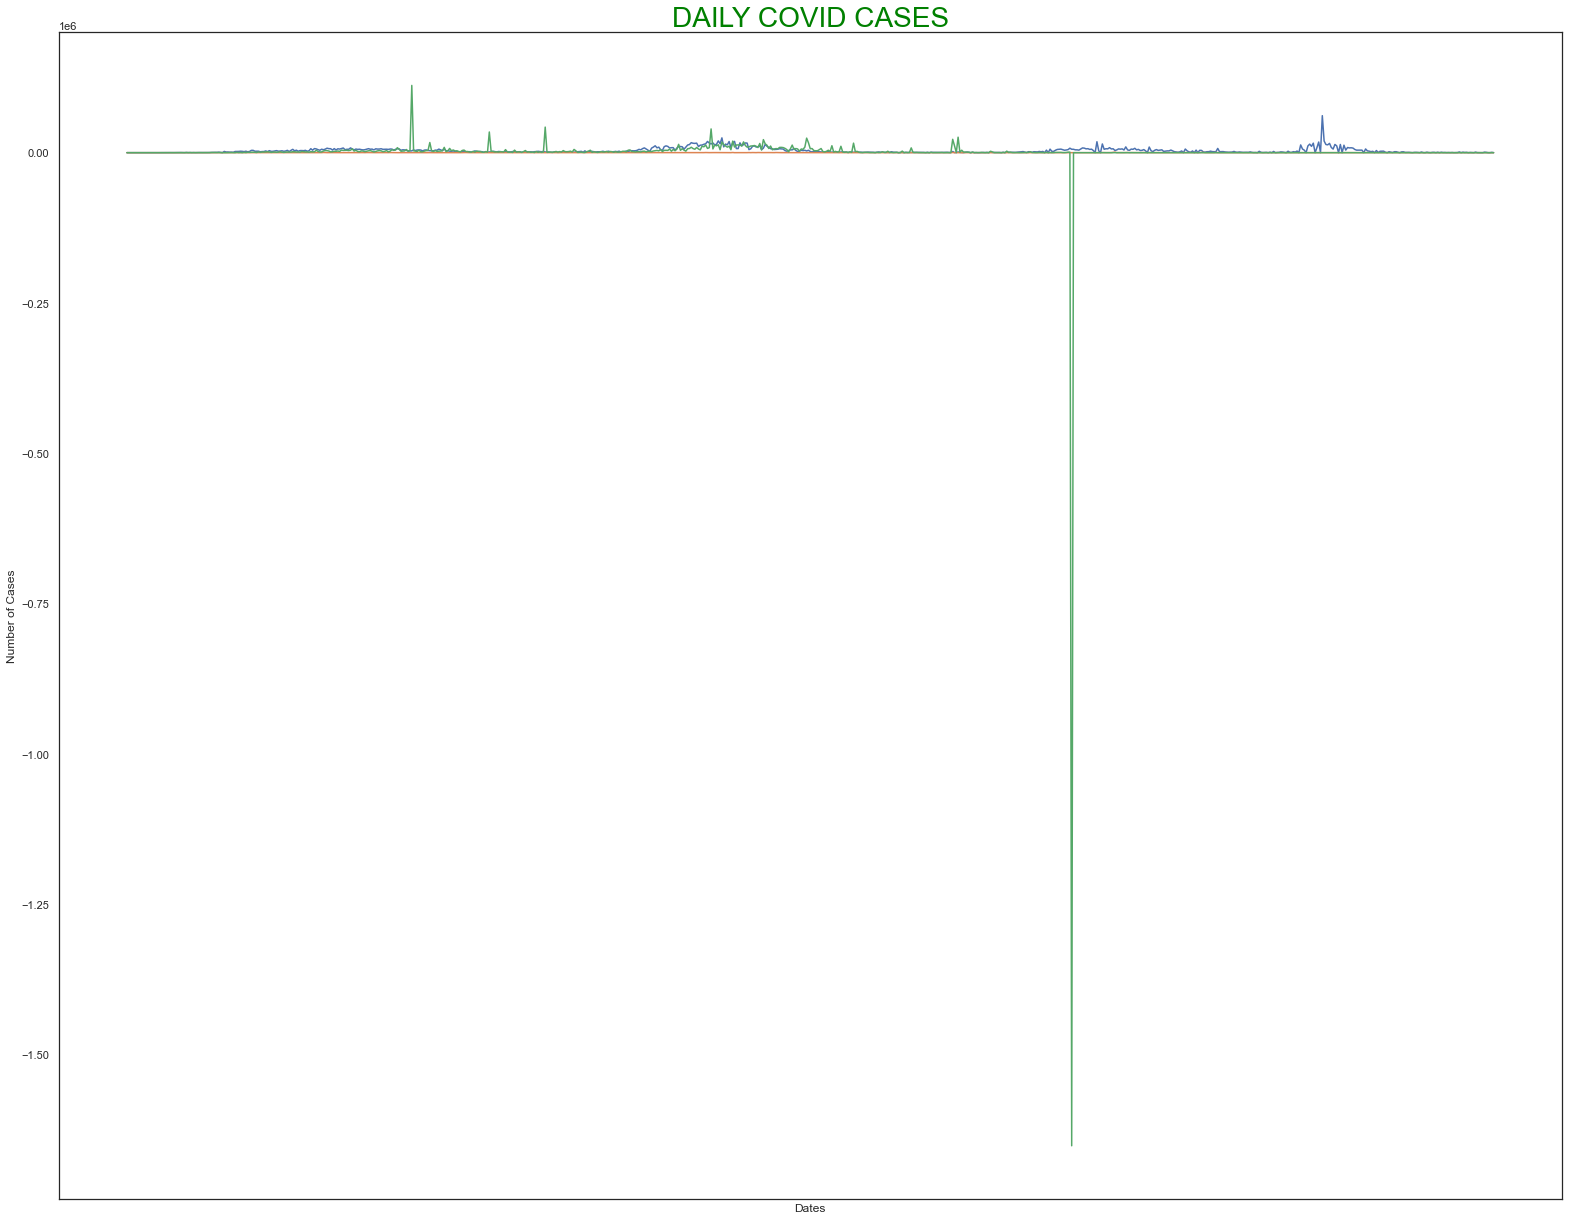

In [499]:
x = df_Nig_global.index
y = df_Nig_global["Daily_Confirmed"]
v = df_Nig_global["Daily_Recovered"]
z = df_Nig_global["Daily_Death"]


f = plt.figure()
f.set_figwidth(24)
f.set_figheight(20)
plt.xlabel("Dates")
plt.ylabel("Number of Cases")
plt.title(label="DAILY COVID CASES", fontsize=28, color="green")
plt.xticks([])


plt.plot(x, 10*y, label = "DAILY CONFIRMED")
plt.plot(x, 10*v, label = "DAILY RECOVERED")
plt.plot(x, 10*z, label = "DAILY DEATH")


<AxesSubplot:title={'center':'TOTAL DAILY CONFIRMED, RECOVERED AND DEATH CASES'}, xlabel='Dates', ylabel='Daily_Confirmed'>

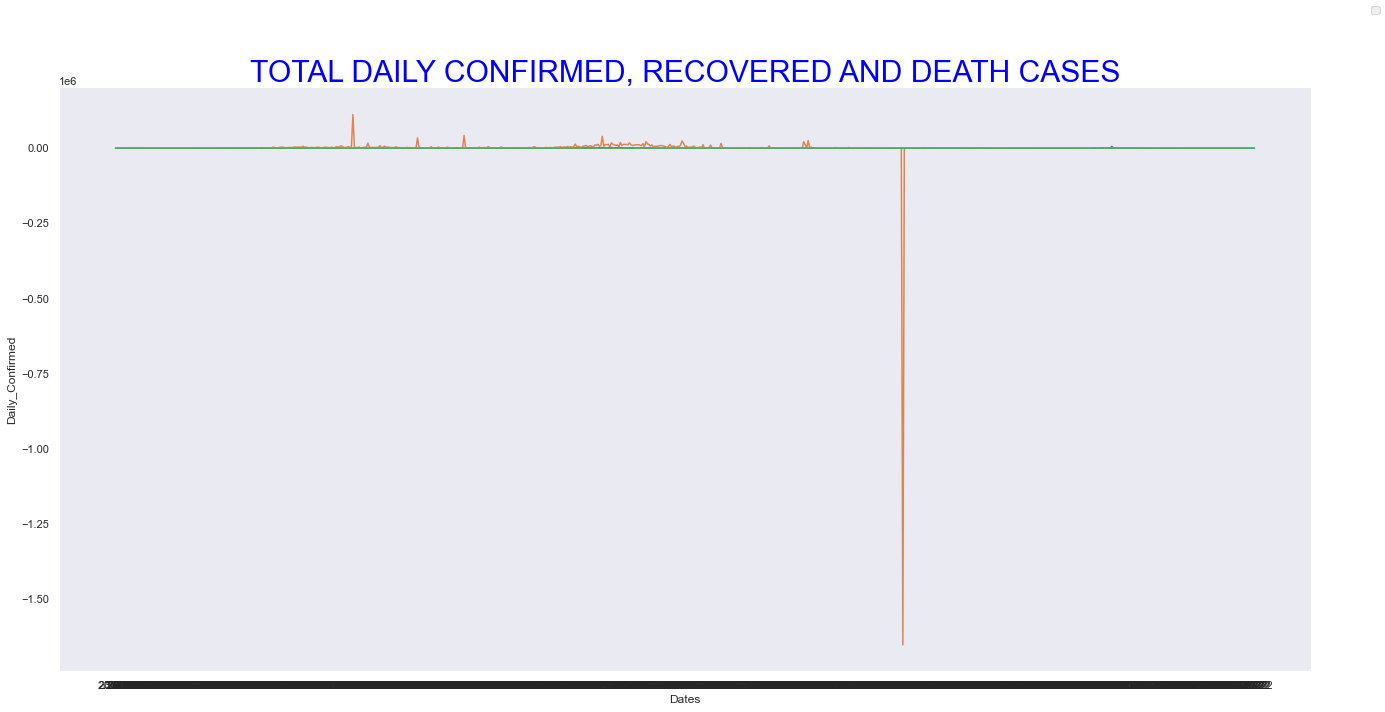

In [394]:
sns.set_style(style="dark")
tips = df_Nig_global
x= df_Nig_global.index
y=df_Nig_global["Daily_Confirmed"]
v = df_Nig_global["Daily_Recovered"]
z = df_Nig_global["Daily_Death"]

d = plt.figure(figsize=(20,10))
d.legend(["Daily_Confirmed", "Daily Recovered", "Daily Death"])
plt.title(label= "TOTAL DAILY CONFIRMED, RECOVERED AND DEATH CASES", fontsize=30, color="blue")
plt.legend = (["Daily_Confirmed", "Daily Recovered", "Daily Death"])
sns.despine()



sns.lineplot(x,y, sort = False)
sns.lineplot(x,10*z, sort = False)
sns.lineplot(x,v, sort = False)

In [401]:
#TODO F -Determine the daily infection rate, you can use the Pandas diff method to find the derivate of the total cases.
#Generate a line plot for the above
# Daily Infection rate has been calculated and column added to the table as daily_-----confirmed
df_Nig_global.head()

,Nig_Confirmed,Nig_Recovered,Nig_Death,Daily_Confirmed,Daily_Recovered,Daily_Death
Dates,,,,,,
2/28/20,1.0,0.0,0.0,1.0,0.0,0.0
2/29/20,1.0,0.0,0.0,0.0,0.0,0.0
3/1/20,1.0,0.0,0.0,0.0,0.0,0.0
3/2/20,1.0,0.0,0.0,0.0,0.0,0.0
3/3/20,1.0,0.0,0.0,0.0,0.0,0.0


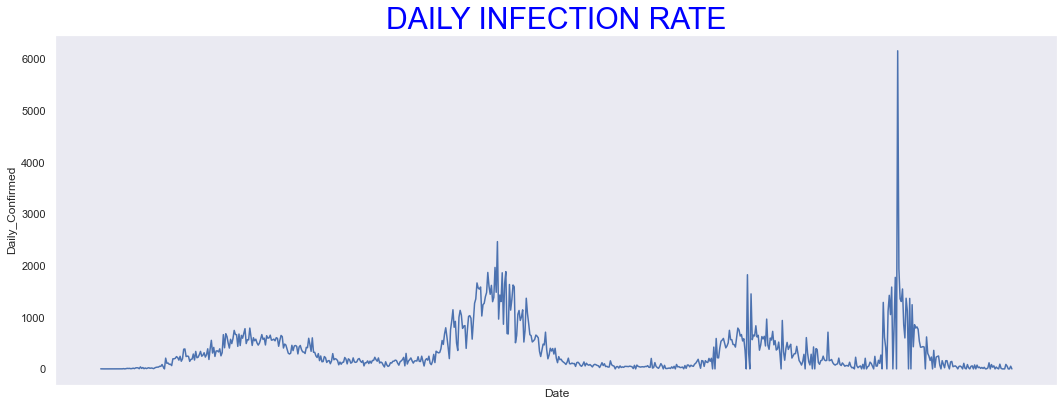

In [402]:
x = df_Nig_global.index
y = df_Nig_global["Daily_Confirmed"]

f = plt.figure()
f.set_figwidth(16)
f.set_figheight(6)
plt.xlabel("Date")
plt.ylabel("Daily_Confirmed")
plt.title(label="DAILY INFECTION RATE", fontsize=30, color="blue")
plt.xticks([])
#plt.xlim()

plt.plot(x, y, label = "DAILY INFECTION")
plt.show()

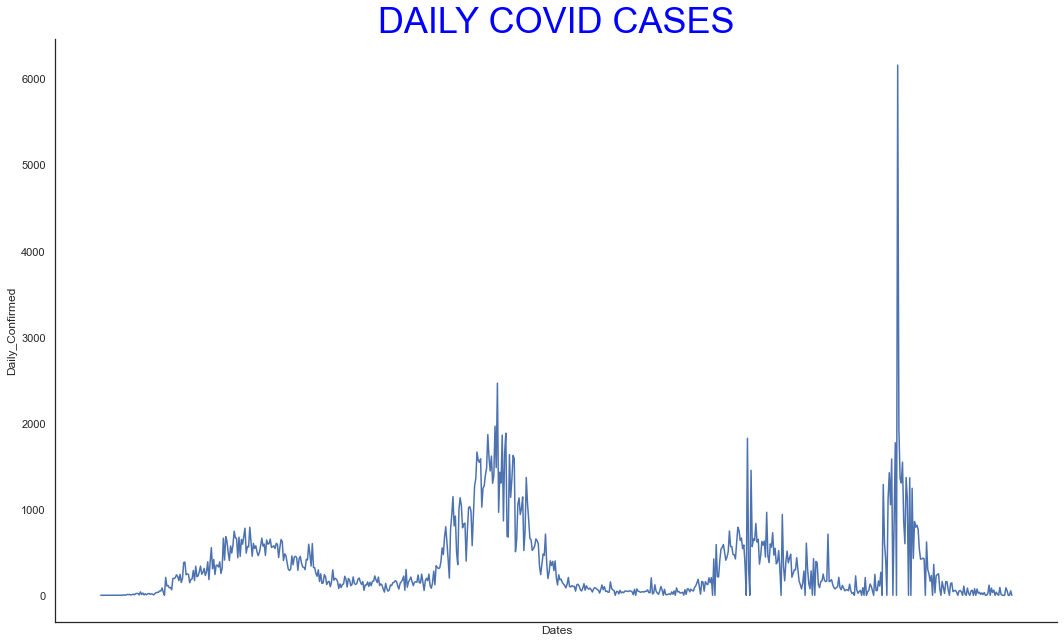

In [403]:
sns.set_style(style="white")
tips = df_Nig_global
x= df_Nig_global.index
y=df_Nig_global["Daily_Confirmed"]

d = plt.figure(figsize=(16,10))

plt.xlabel("Dates")
plt.title(label= "DAILY COVID CASES", fontsize=36, color="blue")
sns.despine()
plt.xticks([])

ax = sns.lineplot(x,y, sort = False)

In [406]:
#TODO G - Calculate maximum infection rate for a day (Number of new cases)
#Find the date
df_Nig_global['Daily_Confirmed'].max()

6158.0

In [407]:
# we can write a function that checks for maximum value in a column
# The function takes in dataset and 'column value
def _max(data, col):
    max = data.nlargest(1, col)
    return max

In [408]:
#Maximum Daily Infection
_max(df_Nig_global, "Daily_Confirmed")

,Nig_Confirmed,Nig_Recovered,Nig_Death,Daily_Confirmed,Daily_Recovered,Daily_Death
Dates,,,,,,
12/22/21,231413.0,2991.0,0.0,6158.0,6.0,0.0


In [409]:
# Maximum Daily Death
_max(df_Nig_global, "Daily_Death")

,Nig_Confirmed,Nig_Recovered,Nig_Death,Daily_Confirmed,Daily_Recovered,Daily_Death
Dates,,,,,,
8/4/20,44433.0,910.0,31851.0,304.0,14.0,11188.0


In [410]:
# Maximum Daily Recovered
_max(df_Nig_global, "Daily_Recovered")

,Nig_Confirmed,Nig_Recovered,Nig_Death,Daily_Confirmed,Daily_Recovered,Daily_Death
Dates,,,,,,
8/29/21,191345.0,2454.0,0.0,362.0,93.0,0.0


In [ ]:
#TODO H - Determine the relationship between the external dataset and the NCDC COVID-19 dataset. Here you will generate a line plot of top 10 confirmed cases and the overall community vulnerability index on the same axis. From the graph, explain your observation.
#Steps
#Combine the two dataset together on a common column(states)
#Create a new dataframe for plotting. This DataFrame will contain top 10 states in terms of confirmed cases i.e sort by confirmed cases. Hint: Check out Pandas nlargest function. This tutorial can help out
#Plot both variable on the same axis. Check out this tutorial

In [411]:
#let's preview the two datasets
df_covid_external.head()

,states,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,FCT,North Central,4865000,0.3,0,0.9,0.4,0.6,0.9,0.6,0.2,0.79
1,Plateau,North Central,4766000,0.4,0,0.4,0.8,0.3,0.3,0.5,0.3,0.93
2,Kwara,North Central,3524000,0.3,0,0.3,0.2,0.4,0.2,0.6,0.7,0.93
3,Nassarawa,North Central,2783000,0.1,0,0.5,0.9,0.0,0.1,0.6,0.5,0.85
4,Niger,North Central,6260000,0.6,0,0.6,0.3,0.7,0.1,0.8,0.8,0.84


In [412]:
df_covidnig.head()

,States Affected,Confirmed Lab Cases,Confirmed Admission Cases,Discharged cases,No. of Deaths
0,Lagos,26708,2435,24037,236
1,FCT,9627,2840,6694,93
2,Kaduna,4504,579,3877,48
3,Plateau,4262,280,3948,34
4,Oyo,3788,368,3374,46


In [413]:
#Rename "States" to match on both dataframes
df_covidnig = df_covidnig.rename(columns = {"States Affected" : "states"})
df_covidnig.head()

,states,Confirmed Lab Cases,Confirmed Admission Cases,Discharged cases,No. of Deaths
0,Lagos,26708,2435,24037,236
1,FCT,9627,2840,6694,93
2,Kaduna,4504,579,3877,48
3,Plateau,4262,280,3948,34
4,Oyo,3788,368,3374,46


In [432]:
#Merge both dataframes
ncdc_external = pd.merge(df_covid_external, df_covidnig, on = "states")
ncdc_external

,states,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR,Confirmed Lab Cases,Confirmed Admission Cases,Discharged cases,No. of Deaths
19,Abia,South East,4190000,0.2,0,0.6,0.1,0.3,0.9,0.2,0.0,1.14,980,25,945,10
32,Osun,South West,5252000,0.0,0,0.4,0.4,0.0,0.8,0.1,0.2,1.06,979,20,937,22
0,FCT,North Central,4865000,0.3,0,0.9,0.4,0.6,0.9,0.6,0.2,0.79,9627,2840,6694,93
6,Bauchi,North East,7270000,0.8,0,0.2,0.8,0.8,0.2,0.8,0.8,0.85,897,108,775,14
8,Borno,North East,6651000,0.9,0,0.1,1.0,1.0,0.1,0.7,0.9,0.89,778,37,705,36
18,Imo,South East,6018000,0.4,1,0.9,0.0,0.4,0.9,0.4,0.0,1.12,734,61,661,12
4,Benue,North Central,6376000,0.5,0,0.5,0.7,0.4,0.4,0.3,0.5,0.91,515,44,460,11
5,Kogi,North Central,4970000,0.1,0,0.2,0.5,0.5,0.4,0.3,0.6,0.87,5,0,3,2
27,Bayelsa,South South,2606000,0.5,0,0.6,0.1,0.9,0.5,0.2,0.7,1.00,497,55,421,21
13,Kaduna,North West,9227000,0.7,0,0.9,0.8,0.9,0.4,0.6,0.4,0.86,4504,579,3877,48


In [438]:
#extract the coloumns to plot
#convert data type for Confirmed Lab Cases to float
ncdc_external_plot= ncdc_external[['states', 'Confirmed Lab Cases','Overall CCVI Index']]
ncdc_external_plot["Confirmed Lab Cases"] = ncdc_external_plot["Confirmed Lab Cases"].astype(float)
ncdc_external_plot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34 entries, 19 to 26
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   states               34 non-null     object 
 1   Confirmed Lab Cases  34 non-null     float64
 2   Overall CCVI Index   34 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.1+ KB


In [442]:
ncdc_external_plot= ncdc_external_plot.sort_values("Confirmed Lab Cases",ascending=False)
ncdc_external_plot=ncdc_external_plot.iloc[0:10]
ncdc_external_plot

,states,Confirmed Lab Cases,Overall CCVI Index
28,Lagos,26708.0,0.0
0,FCT,9627.0,0.3
13,Kaduna,4504.0,0.7
1,Plateau,4262.0,0.4
29,Oyo,3788.0,0.2
24,Rivers,3279.0,0.4
23,Edo,2768.0,0.1
30,Ogun,2382.0,0.3
12,Kano,2032.0,0.6
25,Delta,1843.0,0.4


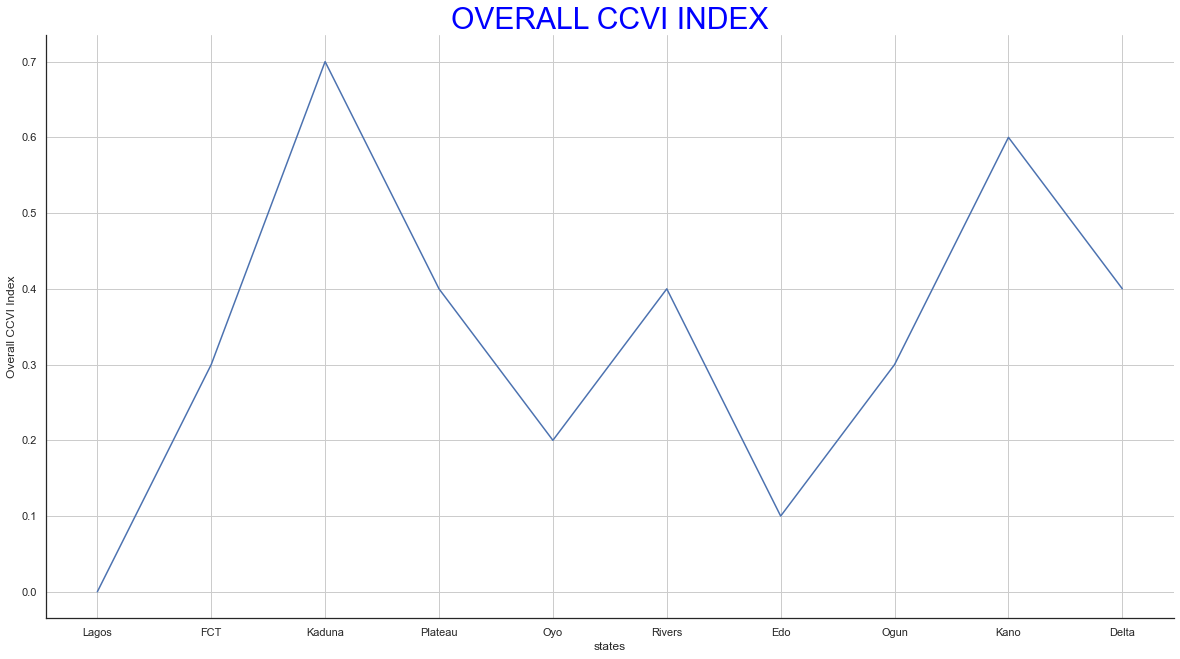

In [443]:
#Plot Map of Overral CCVI Index
y = ncdc_external_plot["Overall CCVI Index"]
x = ncdc_external_plot["states"]
z = ncdc_external_plot["Confirmed Lab Cases"]

f = plt.figure()
f.set_figwidth(18)
f.set_figheight(10)
plt.xlabel("states")
plt.ylabel("Overall CCVI Index")
plt.title(label="OVERALL CCVI INDEX", fontsize=30, color="blue")
#plt.xticks([])
#plt.xlim()
plt.grid()
plt.plot(x, y, label = "Overall CCVI Index")
sns.despine()
plt.show()

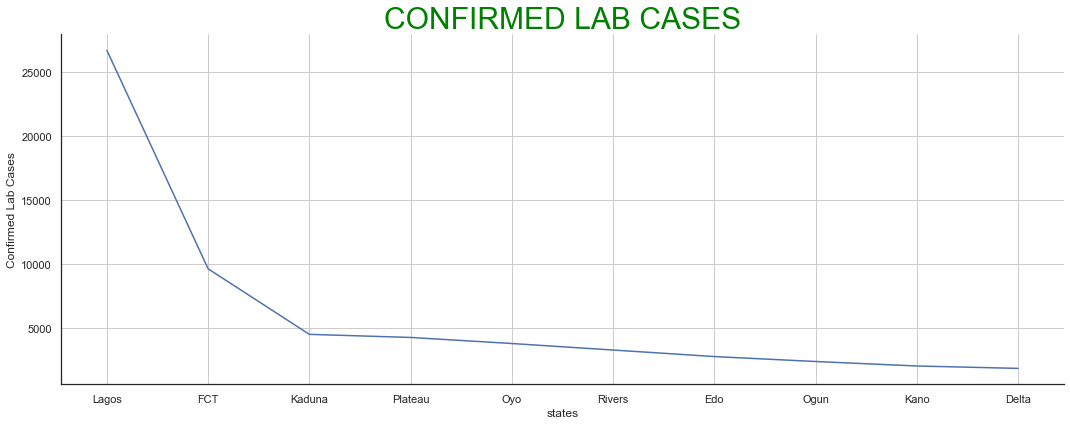

In [444]:
#Plot map of Lab Confirmed cases
f = plt.figure()
f.set_figwidth(16)
f.set_figheight(6)
plt.xlabel("states")
plt.ylabel("Confirmed Lab Cases")
plt.title(label="CONFIRMED LAB CASES", fontsize=30, color="green")
plt.grid()
sns.despine()
plt.plot(x, z, label = "Confirmed Lab Cases")

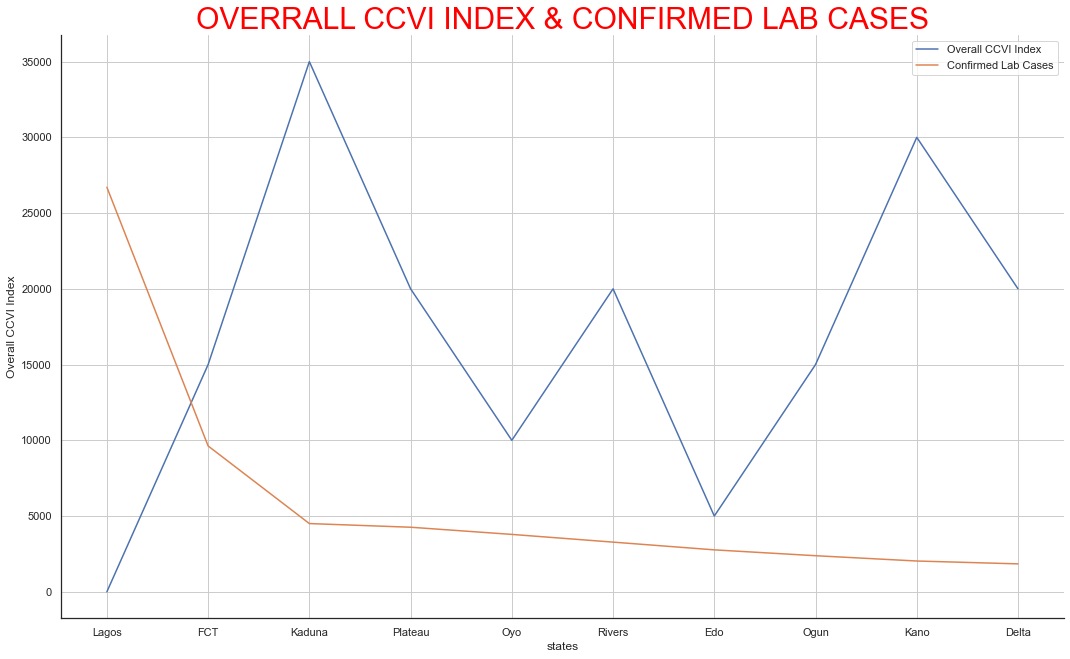

In [452]:
y = ncdc_external_plot["Overall CCVI Index"]
x = ncdc_external_plot["states"]
z = ncdc_external_plot["Confirmed Lab Cases"]


d = plt.figure(figsize=(16,10))
plt.grid()

fii = sns.lineplot(x,50000*y, data = ncdc_external_plot, sort = False)
plt.title(label="OVERRALL CCVI INDEX & CONFIRMED LAB CASES", fontsize=30, color="red")
sns.lineplot(x, z, data = ncdc_external_plot, sort = False)
fii.legend(["Overall CCVI Index", "Confirmed Lab Cases"])
sns.despine()

In [ ]:
#Observation

#This map shows no direct relationship between the number of confirmed covid cases and the Vulnerability Index (which represents the susceptibility of a state to the virus). FCT for example with a CCVI of 0.3 has less than 10000 confirmed cases, but Lagos CCVI OF 0.0 has almost 30000 confirmed cases.

#This could be as a result of false or incorrect report or documentation of covid cases in the States


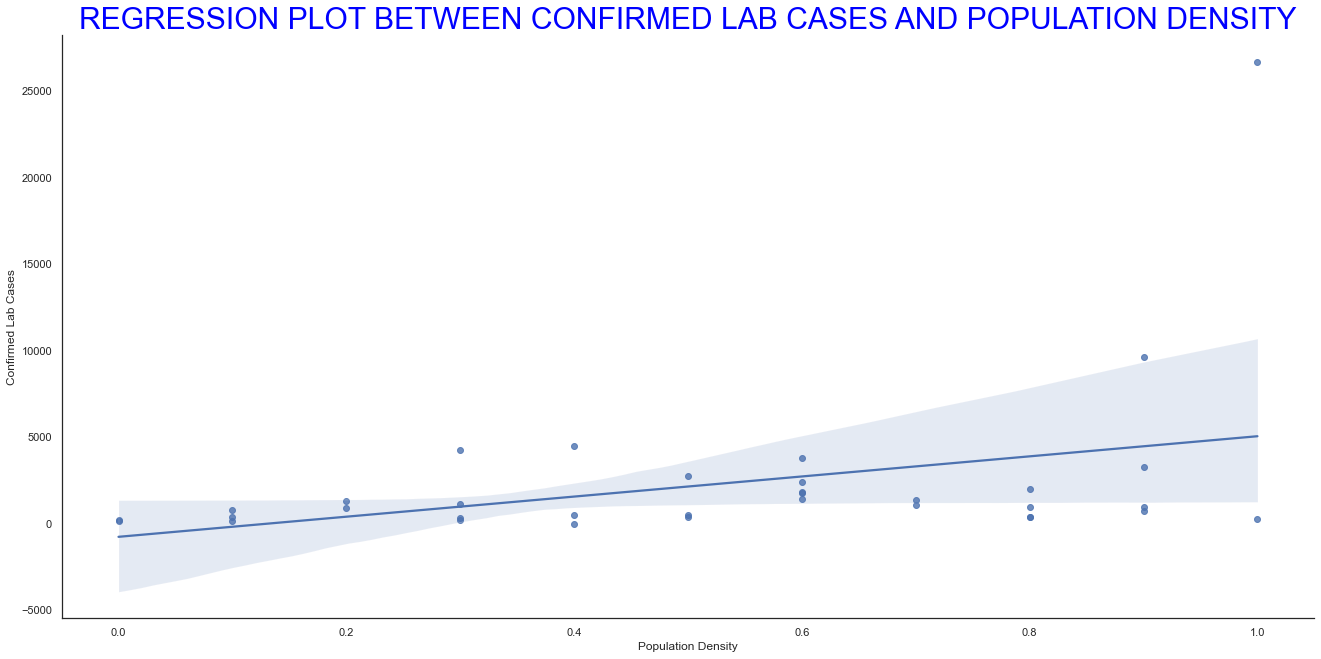

In [454]:
#TODO I - Determine the relationship between the external dataset and the NCDC COVID-19 dataset.
#Here you will generate a regression plot between two variables to visualize the linear relationships - Confirmed Cases and Population Density. Hint: Check out Seaborn Regression Plot.
#Provide a summary of your observation
#convert datatype for Confirmed Lab Cases to enable regression plot
ncdc_external["Confirmed Lab Cases"] = ncdc_external["Confirmed Lab Cases"].astype(float)
sns.set_style("white")
d = plt.figure(figsize=(20,10))
plt.title(label="REGRESSION PLOT BETWEEN CONFIRMED LAB CASES AND POPULATION DENSITY", fontsize=30, color="blue")
ax = sns.regplot(y = "Confirmed Lab Cases", x = "Population Density", data = ncdc_external)
#plt.ylim(0,1.2)
sns.despine()

In [ ]:
#Observation-The regression plot shows the distribution of confirmed cases in relation to Population Desnsity.

In [467]:
#TODO J -
#Provide more analyses by extending TODO G & H. Meaning, determine relationships between more features.
#Provide a detailed summary of your findings.
#Note that you can have as many as possible.
ncdc_external_region= ncdc_external[['region', 'Confirmed Lab Cases','No. of Deaths']]
ncdc_external_region.head()

,region,Confirmed Lab Cases,No. of Deaths
19,South East,980.0,10
32,South West,979.0,22
0,North Central,9627.0,93
6,North East,897.0,14
8,North East,778.0,36


In [468]:
#region with the highest confirmed lab cases- south west
ncdc_external_region.groupby('region')['Confirmed Lab Cases'].max()

region
North Central     9627.0
North East        1164.0
North West        4504.0
South East        1376.0
South South       3279.0
South West       26708.0
Name: Confirmed Lab Cases, dtype: float64

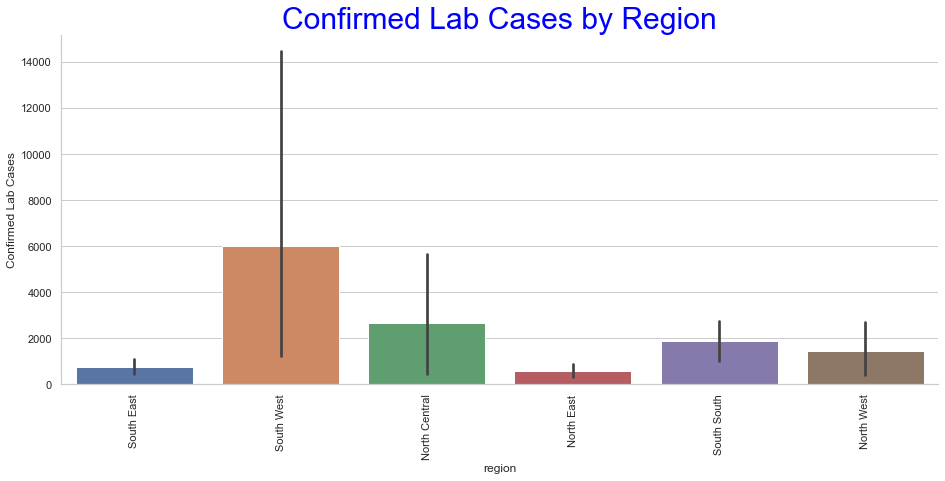

In [469]:
sns.set_style(style="whitegrid")
d = plt.figure(figsize=(14,6))
ax = sns.barplot(x="region", y="Confirmed Lab Cases", data=ncdc_external_region)
plt.title(label= "Confirmed Lab Cases by Region", fontsize=30, color="blue")
plt.xticks(rotation = 90)
sns.despine()

In [478]:
#region with the highest death- south west
ncdc_external_region.groupby('region')['No. of Deaths'].max()

region
North Central     93
North East        36
North West        56
South East        21
South South      113
South West       236
Name: No. of Deaths, dtype: int64

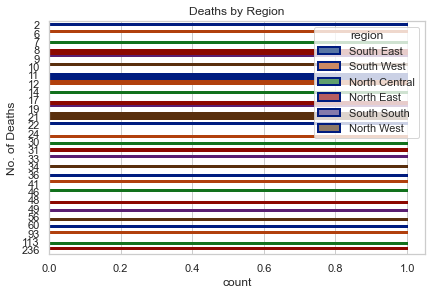

In [477]:
sns.set_theme(style="whitegrid")
ax = sns.countplot(y="No. of Deaths",hue='region', data=ncdc_external_region,
                   linewidth=2,
                   edgecolor=sns.color_palette("dark",6)).set(title='Deaths by Region')

In [ ]:
#Observation- south west region has the highest number of confirmed and death cases.

In [483]:
#TODO L -
#Determine the effect of the Pandemic on the economy. To do this, you will compare the Real GDP value Pre-COVID-19 with Real GDP in 2020 (COVID-19 Period, especially Q2 2020)
#Steps
#From the Real GDP Data, generate a barplot using the GDP values for each year & quarters. For example: On x-axis you will have year 2017 and the bars will be values of each quarters(Q1-Q4). You expected to have subplots of each quarters on one graph.
#Hint: Use Pandas.melt to create your plot DataFrame
#Set your quarter legend to lower left.
#Using axhline, draw a horizontal line through the graph at the value of Q2 2020.
#Write out your observation

#let's preview the data
df_RealGDP

,Year,Q1,Q2,Q3,Q4
0,2014,15438679.50,16084622.31,17479127.58,18150356.45
1,2015,16050601.38,16463341.91,17976234.59,18533752.07
2,2016,15943714.54,16218542.41,17555441.69,18213537.29
3,2017,15797965.83,16334719.27,17760228.17,18598067.07
4,2018,16096654.19,16580508.07,18081342.10,19041437.59
5,2019,16434552.65,16931434.89,18494114.17,19530000.00
6,2020,16740000.00,15890000.00,17820000.00,0.00


In [484]:
#melt required data
melted_gdp = df_RealGDP.melt(id_vars ="Year")
melted_gdp

,Year,variable,value
0,2014,Q1,15438679.50
1,2015,Q1,16050601.38
2,2016,Q1,15943714.54
3,2017,Q1,15797965.83
4,2018,Q1,16096654.19
5,2019,Q1,16434552.65
6,2020,Q1,16740000.00
7,2014,Q2,16084622.31
8,2015,Q2,16463341.91
9,2016,Q2,16218542.41


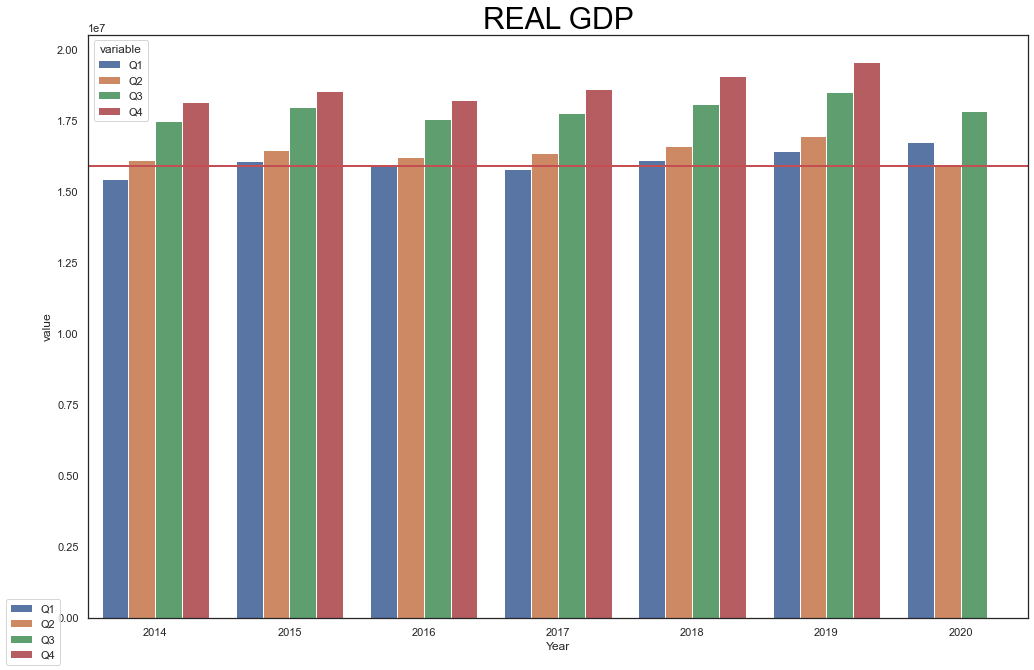

In [488]:
#plot
sns.set_style("white")
d = plt.figure(figsize=(15,10))
graph = sns.barplot(data = melted_gdp, x = "Year", y = "value", hue = "variable")
plt.title(label="REAL GDP", fontsize=30, color="black")
graph.axhline(y = 15890000.00, linewidth = 2, color = "r")
#plt.grid()
d.legend(loc="lower left")
plt.show()

In [ ]:
Observation

Plot showing the real GDP of the country from 2014 - 2020. Plot indicates that the covid period (Q2) of 2020 recorded the lowest Q2 value from 2014 - 2020. 
This indicates the negative impact of covid on the economy for that period.

In [489]:
#Note: Do not limit your analysis to the provided TODOs. Perform more analyses e.g
#Check for more external dataset
#Ask more questions & find the right answers by exploring the data

#get vaccination data for Nigeria from global vaccinatio dataset
df_vaccination.head()

,COUNTRY,ISO3,WHO_REGION,DATA_SOURCE,DATE_UPDATED,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_FULLY_VACCINATED,PERSONS_FULLY_VACCINATED_PER100,VACCINES_USED,FIRST_VACCINE_DATE,NUMBER_VACCINES_TYPES_USED
0,Afghanistan,AFG,EMRO,REPORTING,2022-03-22,5751015.0,5082824.0,14.773,13.057,4420127.0,11.355,"Beijing CNBG - BBIBP-CorV,Janssen - Ad26.COV 2...",2021-02-22,4.0
1,Albania,ALB,EURO,REPORTING,2022-03-13,2764839.0,1296838.0,96.100,45.568,1215359.0,42.705,"AstraZeneca - Vaxzevria,Gamaleya - Gam-Covid-V...",2021-01-13,5.0
2,Algeria,DZA,AFRO,REPORTING,2022-03-09,13704895.0,7461932.0,31.253,17.017,6110712.0,13.935,"Beijing CNBG - BBIBP-CorV,Gamaleya - Gam-Covid...",2021-01-30,4.0
3,American Samoa,ASM,WPRO,REPORTING,2022-03-17,97346.0,43637.0,176.361,79.057,39137.0,70.904,"Janssen - Ad26.COV 2-S,Moderna - Spikevax,Pfiz...",2020-12-21,3.0
4,Andorra,AND,EURO,REPORTING,2022-03-13,151997.0,57817.0,196.700,75.898,53367.0,70.057,"AstraZeneca - Vaxzevria,Moderna - Spikevax,Pfi...",2021-01-20,3.0


In [490]:
df_Nig= df_vaccination[df_vaccination["COUNTRY"] == "Nigeria"]
df_Nig

,COUNTRY,ISO3,WHO_REGION,DATA_SOURCE,DATE_UPDATED,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_FULLY_VACCINATED,PERSONS_FULLY_VACCINATED_PER100,VACCINES_USED,FIRST_VACCINE_DATE,NUMBER_VACCINES_TYPES_USED
148,Nigeria,NGA,AFRO,REPORTING,2022-03-27,31391732.0,21049754.0,15.228,10.211,9565143.0,4.64,SII - Covishield,2021-03-05,1.0


In [ ]:
#The above shows that only 31391732.0 vaccinations had been done as at 2022-03-27

In [494]:
#getting Nigeria data from WHO dataset
df_whodata.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0


In [495]:
df_Nig_WHO= df_whodata[df_whodata["Country"] == "Nigeria"]
df_Nig_WHO

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
122763,2020-01-03,NG,Nigeria,AFRO,0,0,0,0
122764,2020-01-04,NG,Nigeria,AFRO,0,0,0,0
122765,2020-01-05,NG,Nigeria,AFRO,0,0,0,0
122766,2020-01-06,NG,Nigeria,AFRO,0,0,0,0
122767,2020-01-07,NG,Nigeria,AFRO,0,0,0,0
...,...,...,...,...,...,...,...,...
123571,2022-03-21,NG,Nigeria,AFRO,0,255103,0,3142
123572,2022-03-22,NG,Nigeria,AFRO,0,255103,0,3142
123573,2022-03-23,NG,Nigeria,AFRO,87,255190,0,3142
123574,2022-03-24,NG,Nigeria,AFRO,54,255244,0,3142


In [ ]:
#WHO data corresponds with NCDC data for confirmed and death cases.